# 📊 <span style='color:green'>Data Description</span>


#  Heart Disease Dataset

| Variable        | Description                                                                                          |
|-----------------|------------------------------------------------------------------------------------------------------|
| Age             | Age of the patient in years                                                                         |
| Sex             | Gender of the patient, with options: <br> F: Female <br> M: Male                                      |
| ChestPainType   | Type of chest pain experienced by the patient, <br> ATA: Aching <br> NAP: Not Heart-related <br> ASY: Asymptomatic |
| Resting BP      | Resting blood pressure of the patient (mm Hg)                                                        |
| FastingBS       | Fasting blood sugar level of the patient (mg/dl)                                                     |
| MaxHR           | Maximum heart rate achieved by the patient (bpm)                                                     |
| RestingECG      | Results of resting electrocardiogram (ECG) of the patient, <br> 0: Normal <br> 1: Abnormality in ST-T wave <br> 2: Left ventricular hypertrophy |
| ExerciseAngina  | Presence of exercise-induced angina in the patient, <br> 0: No <br> 1: Yes             |
| Oldpeak         | ST depression induced by exercise relative to rest                                                   |
| ST_Slope        | Slope of the ST segment during exercise, <br> 1: Upsloping <br> 2: Flat <br> 3: Downsloping |
| HeartDisease    | Presence of heart disease, <br> 0: No <br> 1: Yes                                      |


# 📚 <span style='color:darkblue'>Import Libraries</span>

In [1]:
import pandas as pd
import numpy as np
#for visualization
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer,RobustScaler, PowerTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# ⚠️ <span style='color:orange'>Remove Warning</span>

In [2]:
import warnings
warnings.filterwarnings('ignore')

# 📂 <span style='color:purple'>Load Data</span>

In [3]:
# read our data
data=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')

In [4]:
#display all columns and rows
pd.set_option("display.max_columns",None)
pd.set_option('display.max_rows',None)

# 🔍 <span style='color:teal'>**Data Exploration**</span>

In [5]:
# show first 5 rows
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
data.shape

(918, 12)

In [8]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [9]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
data.duplicated().sum()

0

# 📊 <span style='color:navy'>**Summary**</span>

- There are 918 entries.
- Age ranges from 28 to 77 years old.
- There is a significant positive skew in cholesterol with a mean of 198.8 and a median of 223, with a maximum value of 603.
- 55% of the patients have heart disease.
- There are no null values.
- There are no duplicates.

***let split our data***

In [11]:
X = data.drop("HeartDisease", axis  =1)
y = data["HeartDisease"]

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📊 <span style='color:purple'>**Data Visualization**</span>

**concat our train data to do visualization**

In [13]:
train_set = pd.concat([x_train,y_train],axis=1)
train_set.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
795,42,M,NAP,120,240,1,Normal,194,N,0.8,Down,0
25,36,M,NAP,130,209,0,Normal,178,N,0.0,Up,0
84,56,M,ASY,150,213,1,Normal,125,Y,1.0,Flat,1
10,37,F,NAP,130,211,0,Normal,142,N,0.0,Up,0
344,51,M,ASY,120,0,1,Normal,104,N,0.0,Flat,1


In [14]:
num = [i for i in train_set.columns if train_set[i].dtype != 'object']
print(num)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


<Axes: >

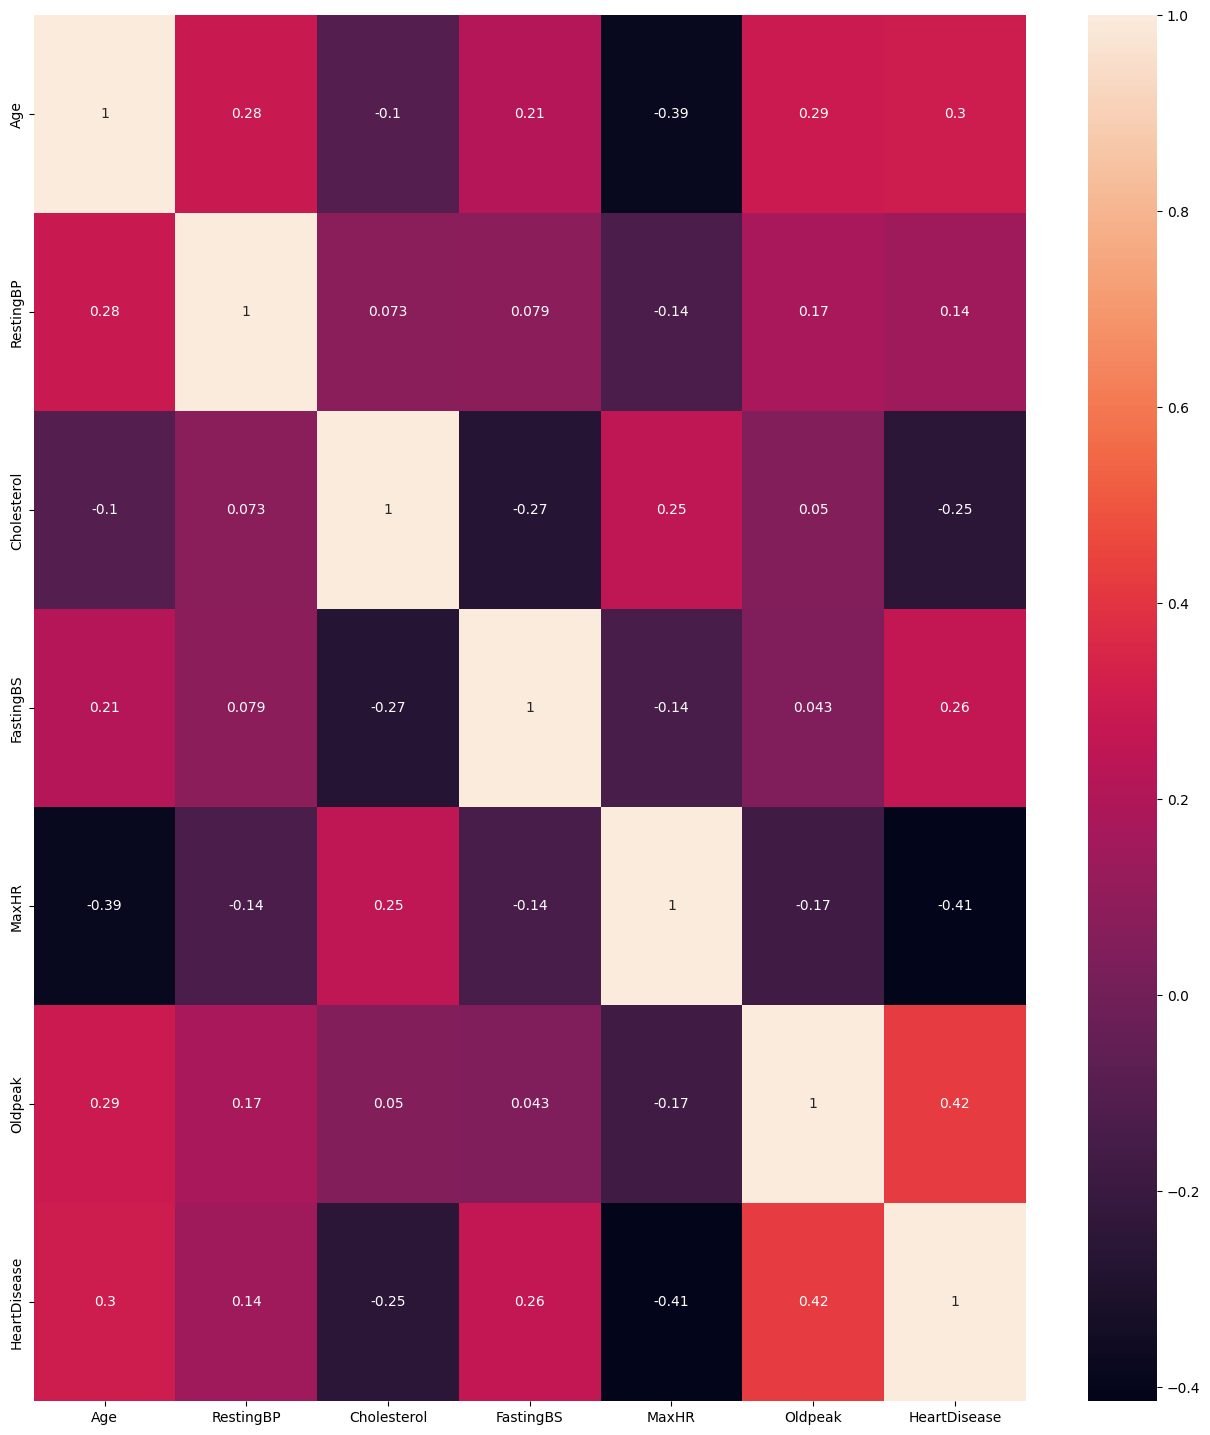

In [15]:
plt.figure(figsize=(16, 18))
sns.heatmap(train_set[num].corr(), annot=True)

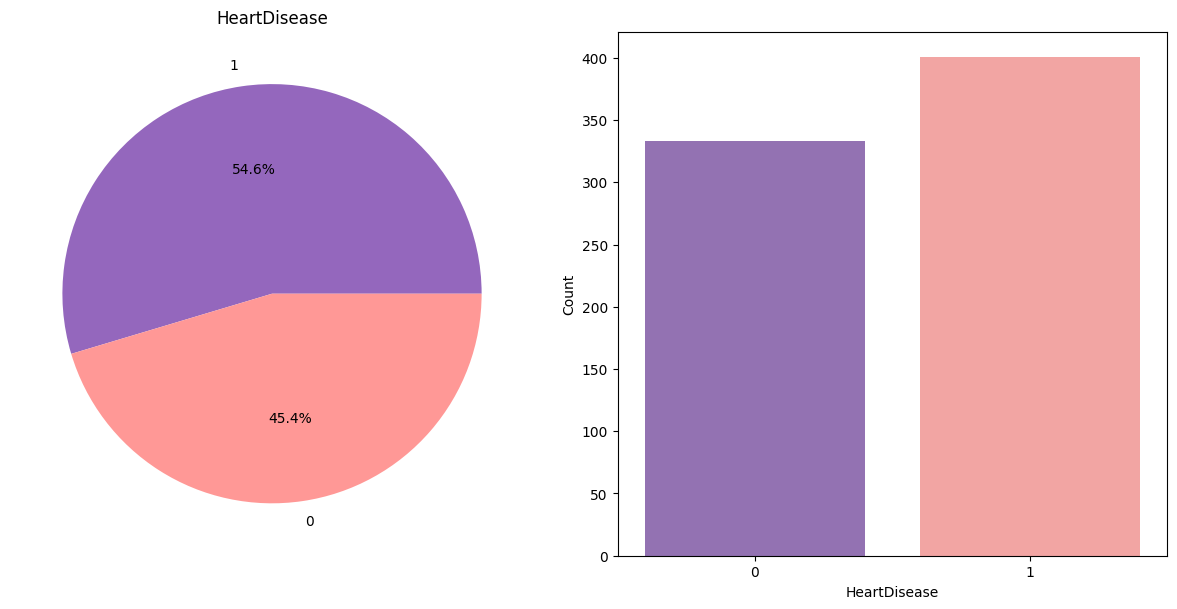

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plotting pie chart
train_set['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#9467bd', '#ff9896'], ax=axs[0])
axs[0].set_title('HeartDisease')
axs[0].set_ylabel('')

# Plotting count plot
sns.countplot(x='HeartDisease', data=train_set,palette=['#9467bd', '#ff9896'], ax=axs[1])
axs[1].set_xlabel('HeartDisease')
axs[1].set_ylabel('Count')

plt.tight_layout()  
plt.show()

# 📈 <span style='color:darkgreen'>**Heart Disease Distribution**</span>

- 54.6% of the population has heart disease.
- 45.4% of the population does not have heart disease.

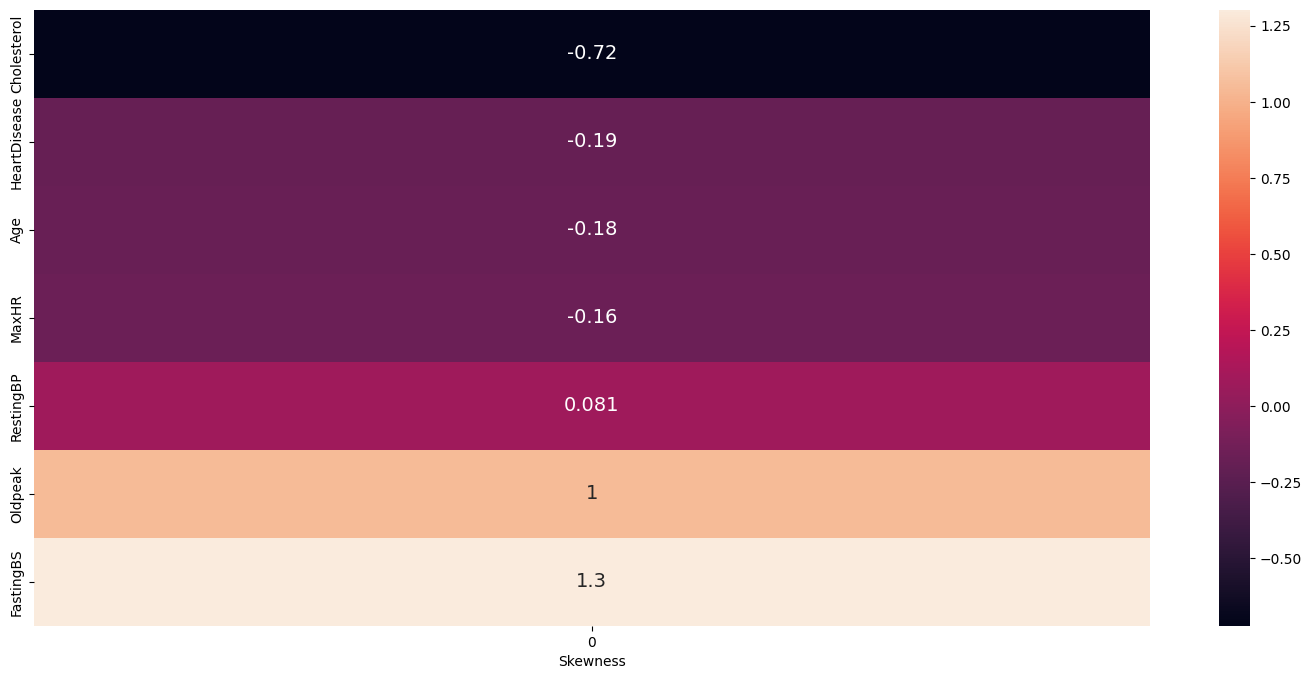

In [17]:
plt.figure(figsize=(18, 8))

sns.heatmap(pd.DataFrame(train_set[num].skew().sort_values(ascending=True)),annot=True,cbar=True,
           annot_kws={'fontsize': 14})
plt.xlabel('Skewness')

plt.show()

In [18]:
def plots_num_column(feature, df):
    """
    A function to plot KDE plot, boxplot of a numerical feature in a dataframe.

    """
    kde_color = '#9467bd'  
    box_color = '#ff9896'  
    
    plt.figure(figsize=(15, 4))
    
   
    plt.subplot(1, 2, 1)
    plt.title('KDE Plot', fontsize=15)
    sns.kdeplot(df[feature], fill=True, color=kde_color)
    

    plt.subplot(1, 2, 2)
    plt.title('Boxplot', fontsize=15)
    sns.boxplot(x=df[feature], palette=[box_color])
    
    plt.tight_layout()
    plt.show()

In [19]:
def plot_box_and_hist(data, column_name, palette="Set1"):
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=data["HeartDisease"].map({0: "normal", 1: "heart disease"}), y=column_name, data=train_set, palette=palette)
    plt.title(f"Box Plot of {column_name} by heart disease")

    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=column_name, hue=data["HeartDisease"].map({0: "Normal", 1: "heart disease"}), palette=palette, kde=True)
    plt.title(f"Histogram of {column_name} by heart disease")

    plt.tight_layout()
    plt.show()

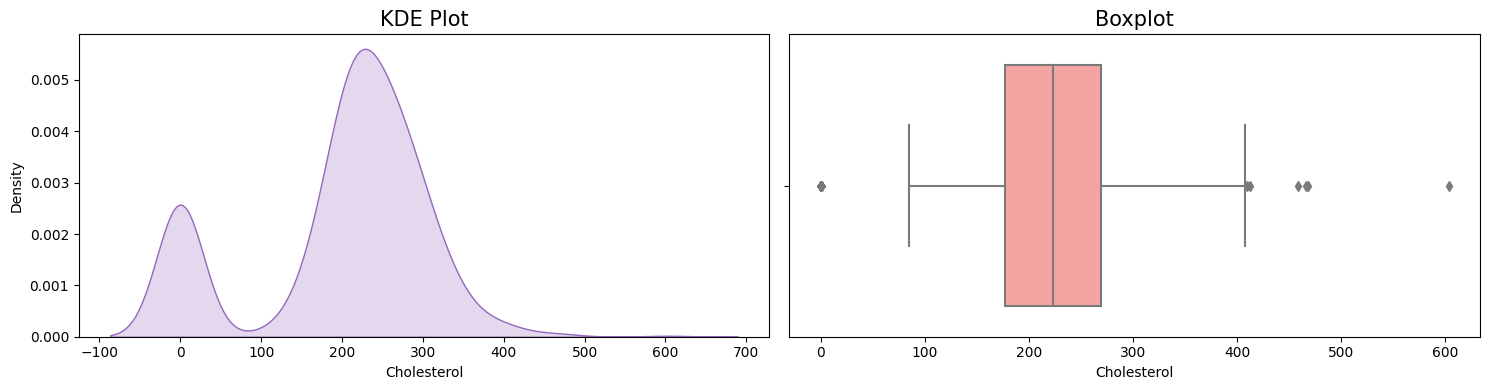

In [20]:
plots_num_column('Cholesterol',train_set)

# 📊 <span style='color:purple'>**Cholesterol Distribution**</span>

- This dataset exhibits a right-skewed distribution for cholesterol.
- The median cholesterol level is around 225 mg/dL, indicating that a higher proportion of people have cholesterol levels below the median.
- There are a few outliers with cholesterol levels above 500 mg/dL, indicating a small number of individuals with very high cholesterol levels in this dataset.


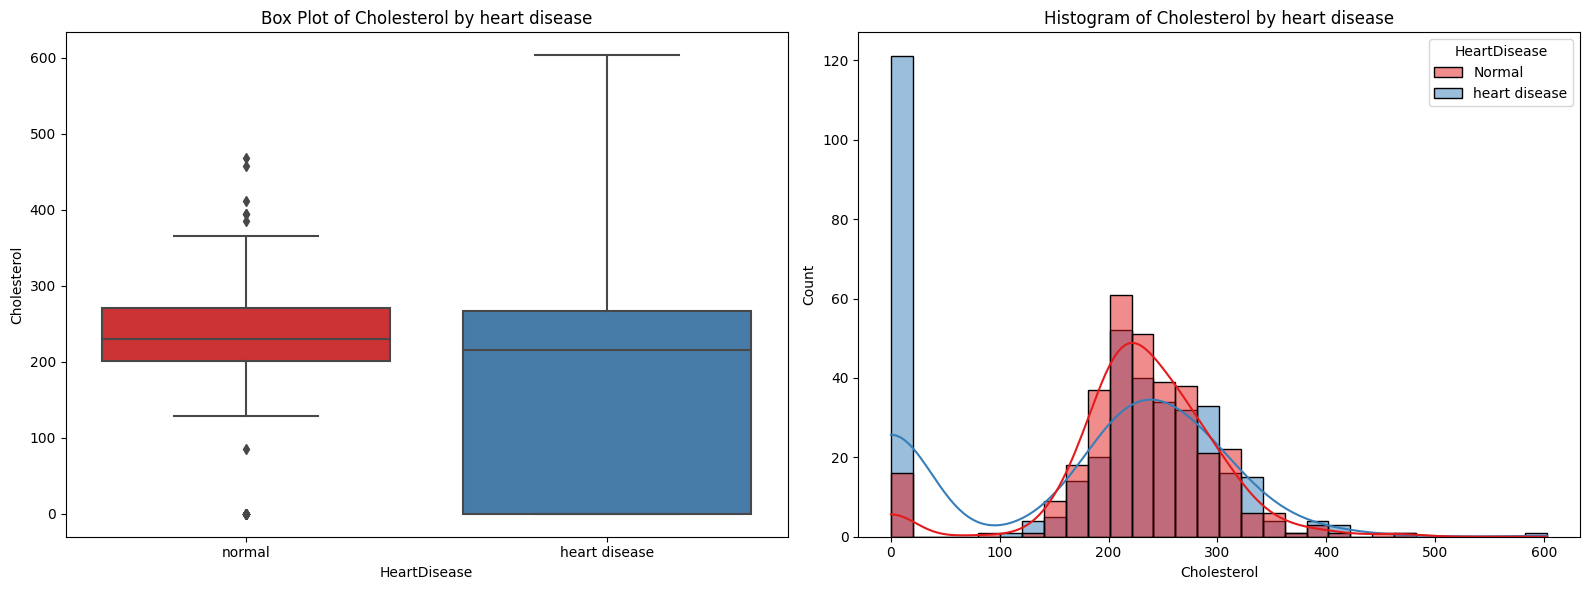

In [21]:
plot_box_and_hist(train_set,"Cholesterol")

# 📊 <span style='color:purple'>**Cholesterol and Heart Disease**</span>
 - people without heart disease have a median cholesterol level around 240.
 - people with heart disease have a median cholesterol level around 230.
 - Most people, regardless of heart disease status, have cholesterol levels between 200 and 300.
 - people with heart disease exhibit a wider range of cholesterol levels compared to those without        heart disease.
 - extremely low cholesterol levels are more frequent in those with heart disease, which could warrant    further investigation.

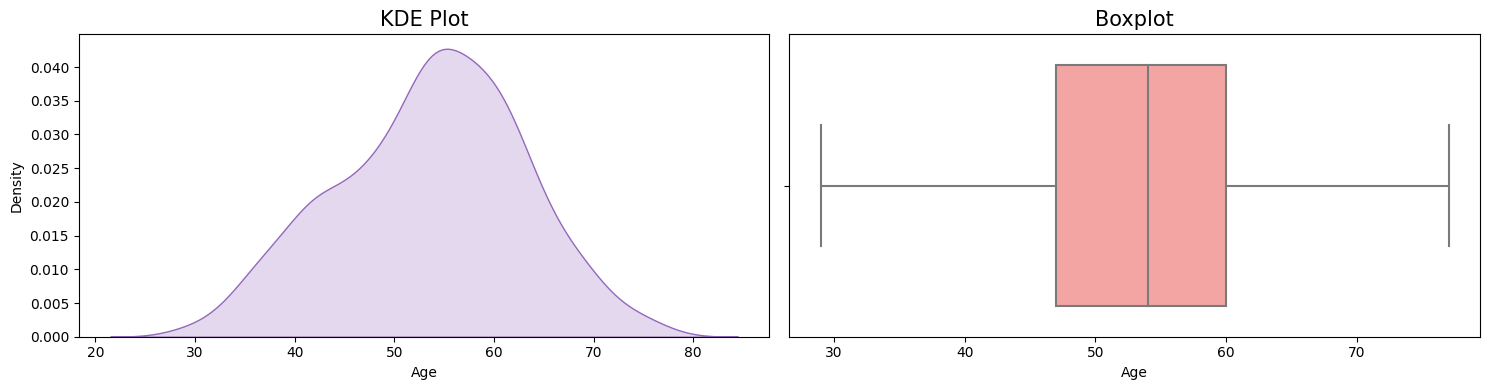

In [22]:
plots_num_column('Age',train_set)

most people there ages between(55-65)



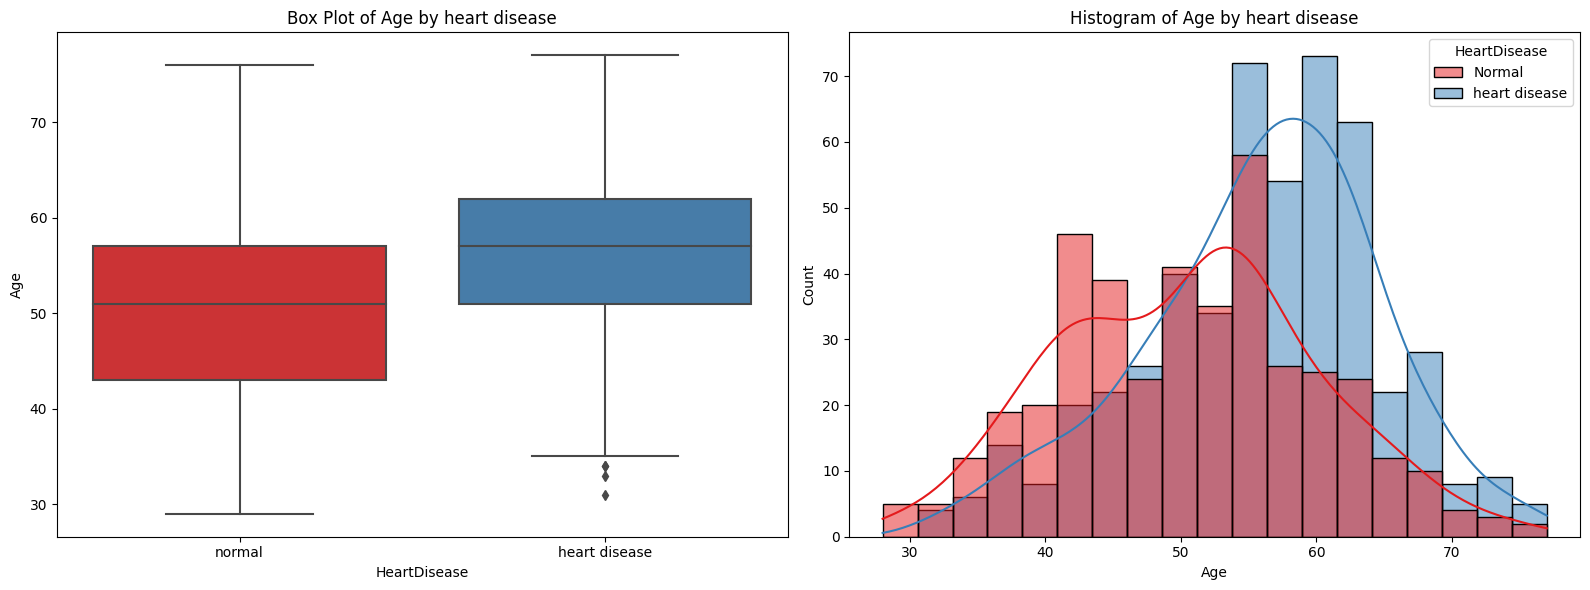

In [23]:
plot_box_and_hist(data,"Age")

# 📊 <span style='color:purple'>**Age and Heart Disease**</span>

  - *Age* is a significant factor in the prevalence of heart disease, with *older individuals* being        more likely to have heart disease.

  - For those with heart disease, the *median age* is higher compared to those without.

  - While heart disease is more common in *older age groups*, it also affects a *notable number* of *younger individuals*.


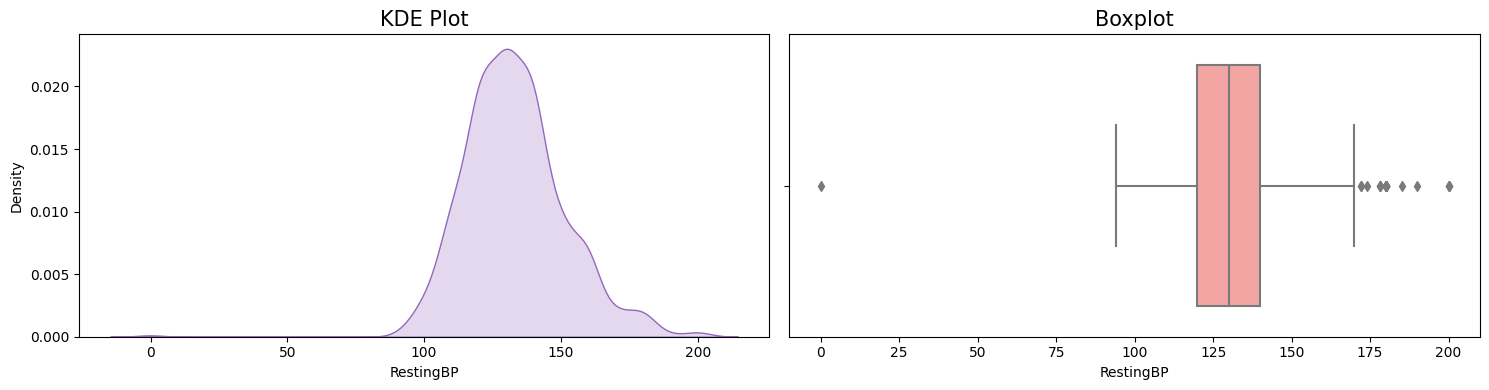

In [24]:
plots_num_column('RestingBP',train_set)

# 📊 <span style='color:purple'>**Resting Blood Pressure Insights**</span>

- RestingBP is right-skewed.
- Most individuals have a RestingBP between 120 and 140.
- More outliers on the higher end (resting blood pressure > 175) than on the lower end (resting blood pressure < 50).
- The median RestingBP is around 130, meaning half of the individuals have a resting blood pressure below this value.


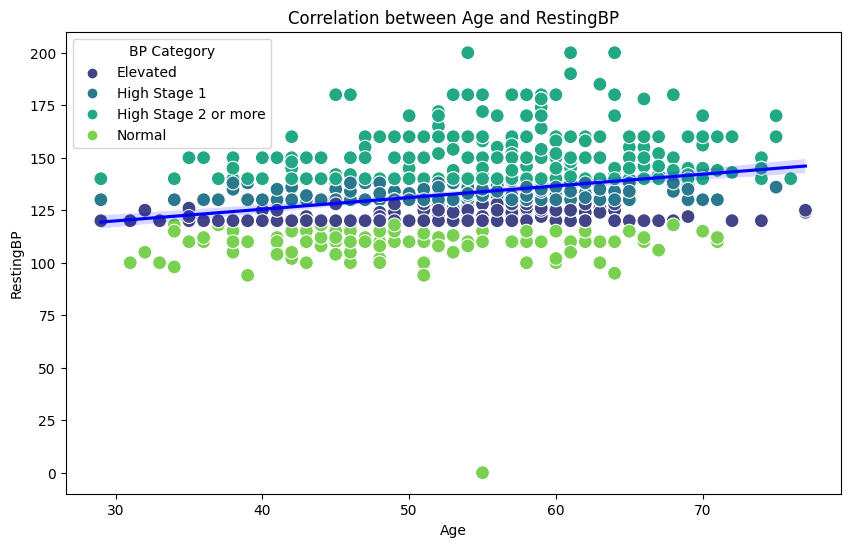

In [25]:
# Define a function to categorize RestingBP as normal or abnormal
def categorize_restingbp(bp):
    if bp < 120:
        return 'Normal'
    elif 120 <= bp < 130:
        return 'Elevated'
    elif 130 <= bp < 140:
        return 'High Stage 1'
    else:
        return 'High Stage 2 or more'

train_set['BP_Category'] = train_set['RestingBP'].apply(categorize_restingbp)

# Plotting with categories
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='RestingBP', hue='BP_Category', palette='viridis', data=train_set, s=100)
sns.regplot(x='Age', y='RestingBP', data=train_set, scatter=False, color='blue')  
plt.title('Correlation between Age and RestingBP' )
plt.xlabel('Age')
plt.ylabel('RestingBP')
plt.legend(title='BP Category')
plt.show()


# 📊 <span style='color:purple'>**Resting Blood Pressure and Age Analysis**</span>

- It suggests that as age increases, RestingBP tends to increase slightly.
- For younger individuals (ages 30-50), most data points fall into the Normal and Elevated categories.
- For older individuals (ages 50-80), there is a higher prevalence of High Stage 1 and High Stage 2 or more categories, indicating a trend of increasing RestingBP with age.
- Individuals classified in High Stage 1 hypertension are at a higher risk of developing cardiovascular diseases compared to those with normal blood pressure.


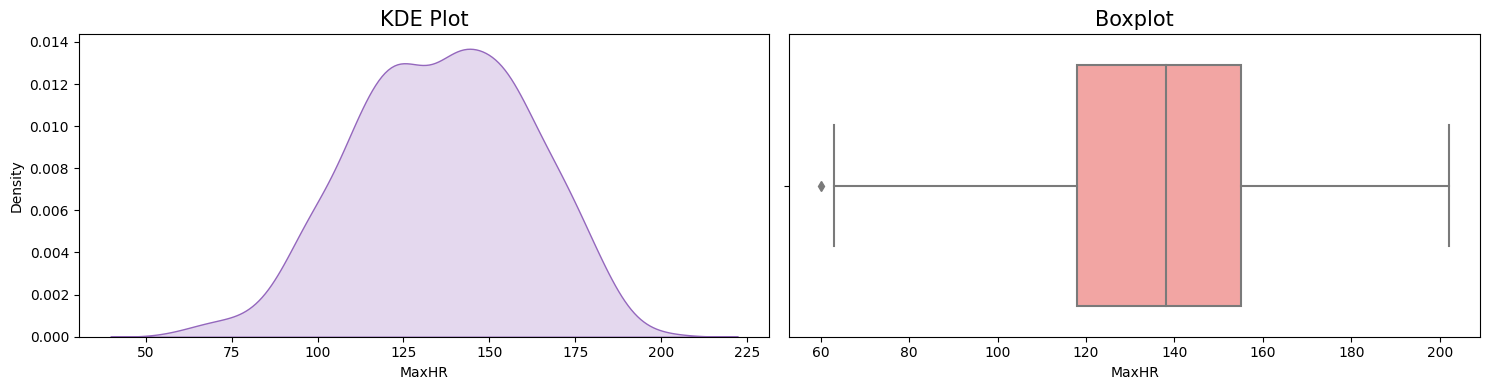

In [26]:
plots_num_column('MaxHR',train_set)

# 📊 <span style='color:purple'>**MaxHR Insights**</span>

- MaxHR is skewed slightly to the right.
- The median MaxHR is around 140, meaning half of the individuals have a MaxHR below this value and half above.
- Most individuals have a MaxHR between 120 and 160.
- There are some individuals with significantly lower MaxHR values that indicate affect with disease.


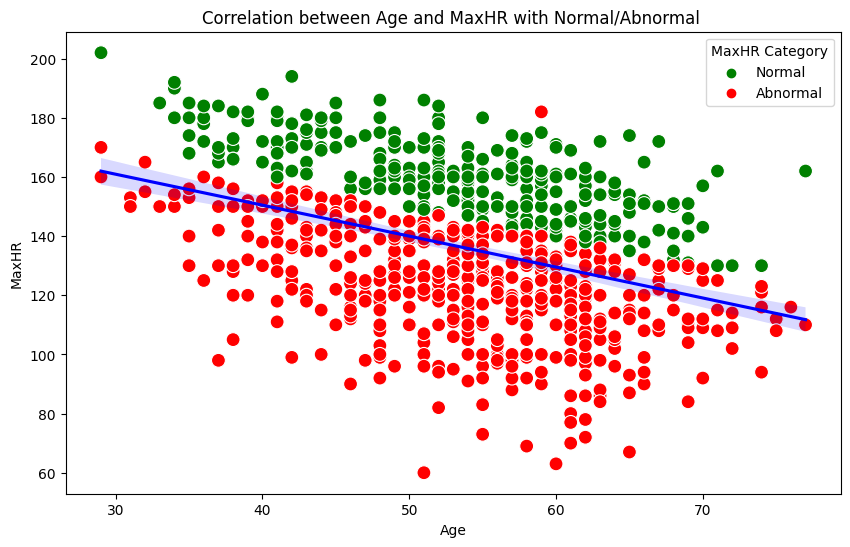

In [27]:
def categorize_maxhr(row):
    expected_maxhr = 220 - row['Age']
    if abs(row['MaxHR'] - expected_maxhr) <= 20:  # Within 20 bpm of expected MaxHR
        return 'Normal'
    else:
        return 'Abnormal'
train_set['Category'] = train_set.apply(categorize_maxhr, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='MaxHR', hue='Category', palette={'Normal': 'green', 'Abnormal': 'red'}, data= train_set, s=100)
sns.regplot(x='Age', y='MaxHR', data=train_set, scatter=False, color='blue')  
plt.title('Correlation between Age and MaxHR with Normal/Abnormal ')
plt.xlabel('Age')
plt.ylabel('MaxHR')
plt.legend(title='MaxHR Category')
plt.show()

# 📊 <span style='color:purple'>**MaxHR Trends by Age**</span>

- MaxHR decreases as age increases.
- **Younger Individuals (30-50 years):**
  - Low MaxHR may indicate health problems.
- **Older Individuals (50-70 years):**
  - Increased likelihood of abnormally low MaxHR, which could be related to aging.


In [28]:
categorical_features =['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'] 

**Plotting each categorical feature**

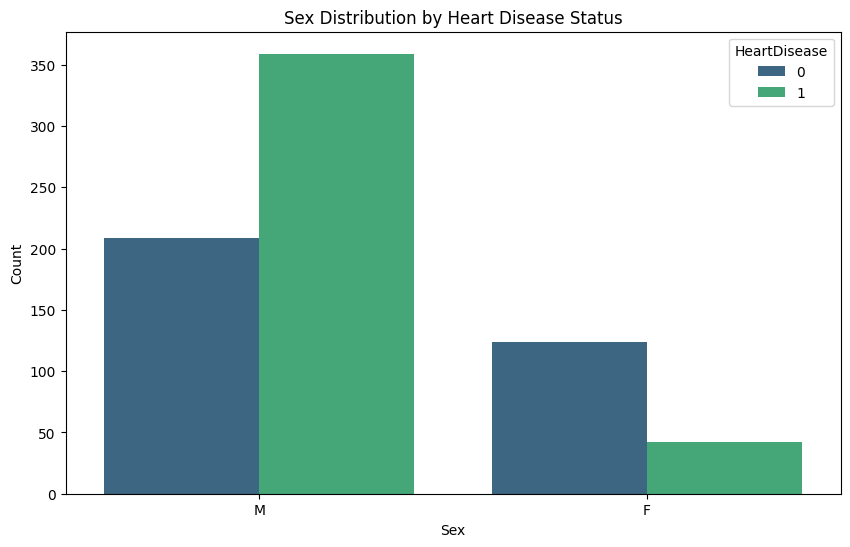

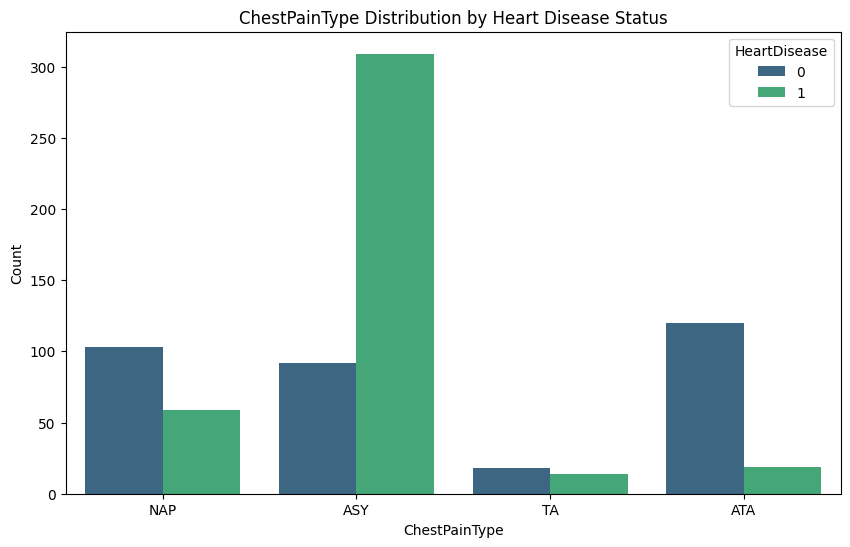

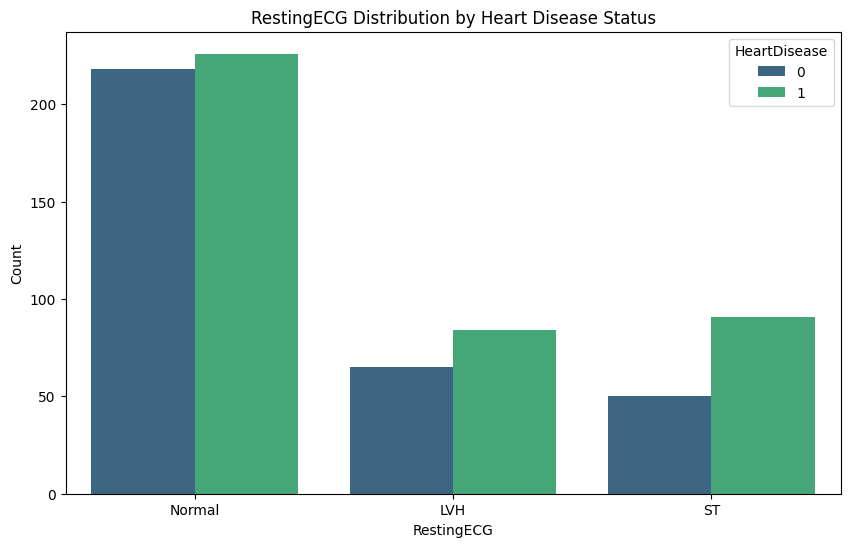

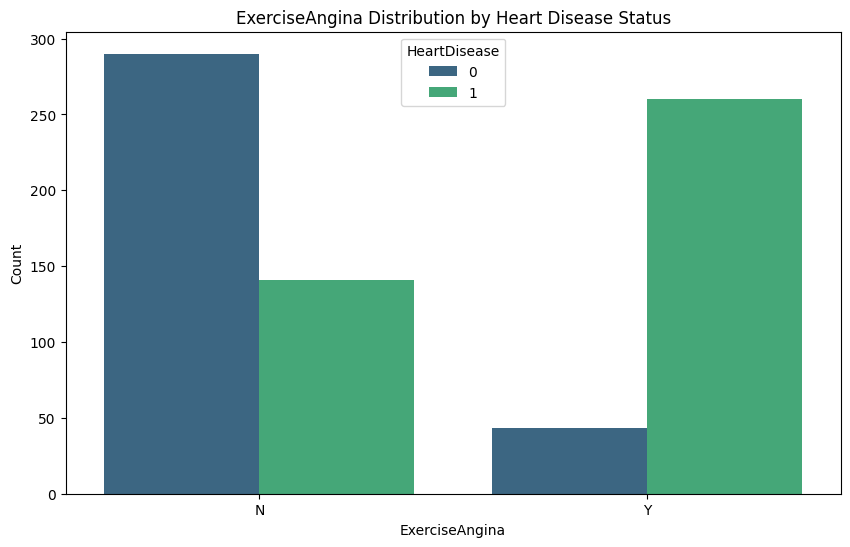

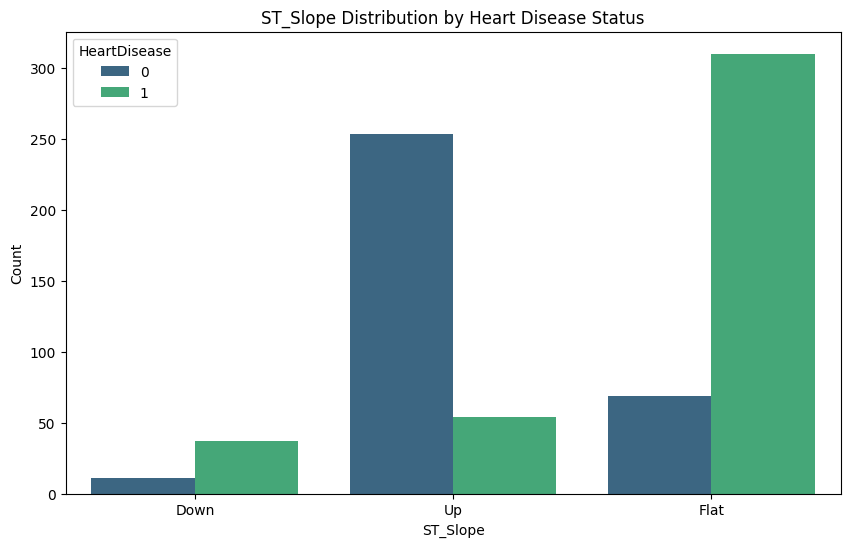

In [29]:
train_set['HeartDisease'] = train_set['HeartDisease'].astype(str)
for feature in categorical_features:
    train_set[feature] = train_set[feature].astype(str)

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=train_set, x=feature, hue='HeartDisease', palette='viridis')
    plt.title(f'{feature} Distribution by Heart Disease Status')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()


# 🛠️ <span style='color:purple'>**Modelling**</span>


In [30]:
numeric_features =['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

In [31]:
# Define the numeric pipeline
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('outlier_remover', RobustScaler()),
    ('skewness_corrector', PowerTransformer(method='yeo-johnson', standardize=True))
])

# Define the categorical pipeline
categorical_transformer = OneHotEncoder(handle_unknown='ignore')


preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor)
])


In [32]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier_remover',
                                                                   RobustScaler()),
                                                                  ('skewness_corrector',
                                                                   PowerTransformer())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])]))])

In [33]:
X_train_transformed = pipeline.fit_transform(x_train)
X_test_transformed = pipeline.transform(x_test)


In [34]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
clf1 = LogisticRegression()
clf2 = RandomForestClassifier()
clf3 = GradientBoostingClassifier()

In [35]:
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('rf', clf2), ('gb', clf3)],
    voting='hard'  # or 'soft' for probabilistic voting
)

In [36]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', voting_clf)
])

In [37]:
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('outlier_remover',
                                                                   RobustScaler()),
                                                                  ('skewness_corrector',
                                                                   PowerTransformer())]),
                                                  ['Age', 'RestingBP',
                                                   'Cholesterol', 'FastingBS',
                                                   'MaxHR', 'Oldpeak']),
                                                 ('categorical',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Sex', 'ChestPainType',
                                                   'RestingECG',
                                                   'ExerciseAngina',
                                                   'ST_Slope'])])),
                ('classifier',
                 VotingClassifier(estimators=[('lr', LogisticRegression()),
                                              ('rf', RandomForestClassifier()),
                                              ('gb',
                                               GradientBoostingClassifier())]))])

In [38]:
# Transform the test data
y_pred = pipeline.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score, classification_report

# Print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print(classification_report(y_test, y_pred))


Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



In [40]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

NameError: name 'ConfusionMatrixDisplay' is not defined